In [31]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [32]:
import numpy as np
import pandas as pd

In [33]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [34]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [35]:
# Path to sqlite
database_path = "Resources/hawaii.sqlite"

# Create an engine that can talk to the database
engine = create_engine(f"sqlite:///{database_path}")


In [36]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [37]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [38]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [39]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [40]:
# Using the inspector to print the column names within the 'Measurement' table and its types
inspector = inspect(engine)
columns = inspector.get_columns('Measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [41]:
columns = inspector.get_columns('Station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [42]:
latest = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(latest)

('2017-08-23',)


In [43]:
one_year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
print(one_year_ago)

2016-08-23


In [44]:
prec = session.query(Measurement.date, Measurement.prcp).\
       filter(Measurement.date >= one_year_ago).\
       order_by(Measurement.date).all()
print(prec)

[('2016-08-23', 0.0), ('2016-08-23', 0.15), ('2016-08-23', 0.05), ('2016-08-23', None), ('2016-08-23', 0.02), ('2016-08-23', 1.79), ('2016-08-23', 0.7), ('2016-08-24', 0.08), ('2016-08-24', 2.15), ('2016-08-24', 2.28), ('2016-08-24', None), ('2016-08-24', 1.22), ('2016-08-24', 2.15), ('2016-08-24', 1.45), ('2016-08-25', 0.08), ('2016-08-25', 0.08), ('2016-08-25', 0.0), ('2016-08-25', 0.0), ('2016-08-25', 0.21), ('2016-08-25', 0.06), ('2016-08-25', 0.11), ('2016-08-26', 0.0), ('2016-08-26', 0.03), ('2016-08-26', 0.02), ('2016-08-26', 0.04), ('2016-08-26', 0.0), ('2016-08-26', 0.01), ('2016-08-27', 0.0), ('2016-08-27', 0.18), ('2016-08-27', 0.02), ('2016-08-27', 0.0), ('2016-08-27', 0.12), ('2016-08-27', None), ('2016-08-28', 0.01), ('2016-08-28', 0.14), ('2016-08-28', 0.14), ('2016-08-28', 0.14), ('2016-08-28', 0.6), ('2016-08-28', 2.07), ('2016-08-29', 0.0), ('2016-08-29', 0.17), ('2016-08-29', 0.04), ('2016-08-29', None), ('2016-08-29', 0.0), ('2016-08-29', 0.35), ('2016-08-29', 0.9),

In [45]:
prec_dataframe = pd.DataFrame(prec, columns = ['date', 'prcp'])
prec_dataframe.set_index('date').head()

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


<Figure size 360x288 with 0 Axes>

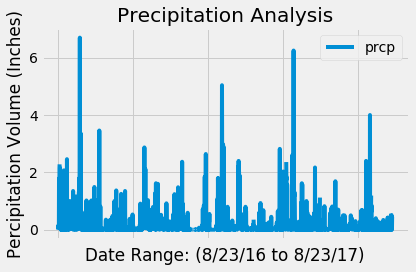

In [46]:
fig1 = plt.figure(figsize=(5,4))
prec_dataframe.plot('date', 'prcp')
plt.grid(True)
plt.xlabel("Date Range: (8/23/16 to 8/23/17)")
plt.ylabel("Percipitation Volume (Inches)")
plt.title("Precipitation Analysis")
plt.legend()
plt.tight_layout()
plt.show()
plt.close(fig1)

# Exploratory Climate Analysis

('2017-08-23',)
2016-08-23


<Figure size 360x288 with 0 Axes>

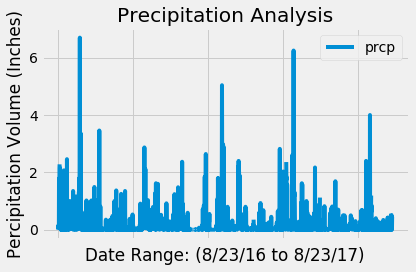

In [47]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
latest = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(latest)

# Calculate the date 1 year ago from the last data point in the database
one_year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
print(one_year_ago)

# Perform a query to retrieve the data and precipitation scores
prec = session.query(Measurement.date, Measurement.prcp).\
       filter(Measurement.date >= one_year_ago).\
       order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
prec_dataframe = pd.DataFrame(prec, columns = ['date', 'prcp'])

# Sort the dataframe by date
prec_dataframe.set_index('date').head()

# Use Pandas Plotting with Matplotlib to plot the data
fig1 = plt.figure(figsize=(5,4))
prec_dataframe.plot('date', 'prcp')
plt.grid(True)
plt.xlabel("Date Range: (8/23/16 to 8/23/17)")
plt.ylabel("Percipitation Volume (Inches)")
plt.title("Precipitation Analysis")
plt.legend()
plt.tight_layout()
plt.show()
plt.close(fig1)

In [48]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prec_dataframe.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [49]:
# Design a query to show how many stations are available in this dataset?
location_station = session.query(Measurement).group_by(Measurement.station).count()
print(location_station)

9


In [50]:
# What are the most active stations? (i.e. what stations have the most rows)?
active_stations = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).all()

# List the stations and the counts in descending order.
desc_active_stations = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).\
                        order_by(func.count(Measurement.tobs).desc()).all()
print(desc_active_stations)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [51]:
desc_active_stations = session.query(Measurement.station, Measurement.tobs, func.count(Measurement.tobs)).group_by(Measurement.station).\
                        order_by(func.count(Measurement.tobs).desc()).all()
print(desc_active_stations)

[('USC00519281', 70.0, 2772), ('USC00519397', 65.0, 2724), ('USC00513117', 67.0, 2709), ('USC00519523', 75.0, 2669), ('USC00516128', 73.0, 2612), ('USC00514830', 67.0, 2202), ('USC00511918', 66.0, 1979), ('USC00517948', 75.0, 1372), ('USC00518838', 72.0, 511)]


In [52]:
most_active_station = desc_active_stations[0][0]
print(most_active_station)

USC00519281


In [53]:
lowest_temp = session.query(Station.station, func.avg(Measurement.tobs)).group_by(Measurement.station).order_by(func.avg(Measurement.tobs).desc()).all()
print(lowest_temp)

[('USC00519397', 74.8732970027248), ('USC00519397', 74.68440233236151), ('USC00519397', 74.55323054331865), ('USC00519397', 74.5436493068565), ('USC00519397', 72.72407045009784), ('USC00519397', 72.68918420081211), ('USC00519397', 71.66378066378067), ('USC00519397', 71.61596766043456), ('USC00519397', 70.91500765696784)]


In [54]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
lowest_temp = session.query(func.min(Measurement.tobs)).all()
print(lowest_temp)

# highest temperature recorded
highest_temp = session.query(func.max(Measurement.tobs)).all()
print(highest_temp)

# average temperature most active station
avg_temp = session.query(func.avg(Measurement.tobs)).all()
print(avg_temp)

[(53.0,)]
[(87.0,)]
[(73.09795396419437,)]


('2017-08-23',)
2016-08-23


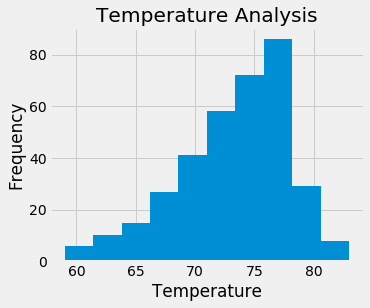

In [55]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
latest = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(latest)

# Calculate the date 1 year ago from the last data point in the database
one_year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
print(one_year_ago)

# Perform a query to retrieve the data and precipitation scores
tobs = session.query(Measurement.date, Measurement.tobs).\
       filter(Measurement.date >= one_year_ago).\
       filter(Measurement.station == most_active_station).\
       order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
tobs_dataframe = pd.DataFrame(tobs)

# Use Pandas Plotting with Matplotlib to plot the data
fig1 = plt.figure(figsize=(5,4))
plt.grid(True)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Temperature Analysis")
plt.hist(tobs_dataframe['tobs'])
bins=12
plt.show()

In [56]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


![precipitation](Images/station-histogram.png)

In [ ]:
## Optional Challenge Assignment

In [80]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [81]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps2(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps2('2017-02-28', '2017-03-05'))

[(64.0, 72.02777777777777, 78.0)]


In [17]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


62.0 68.36585365853658 74.0


<IPython.core.display.Javascript object>


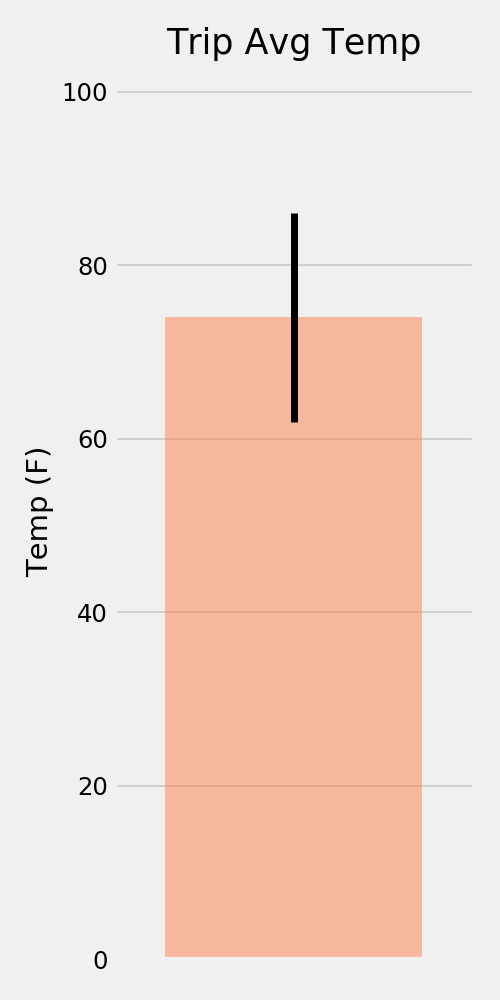

In [18]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [19]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.31), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.25), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.1), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.060000000000000005), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]


## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


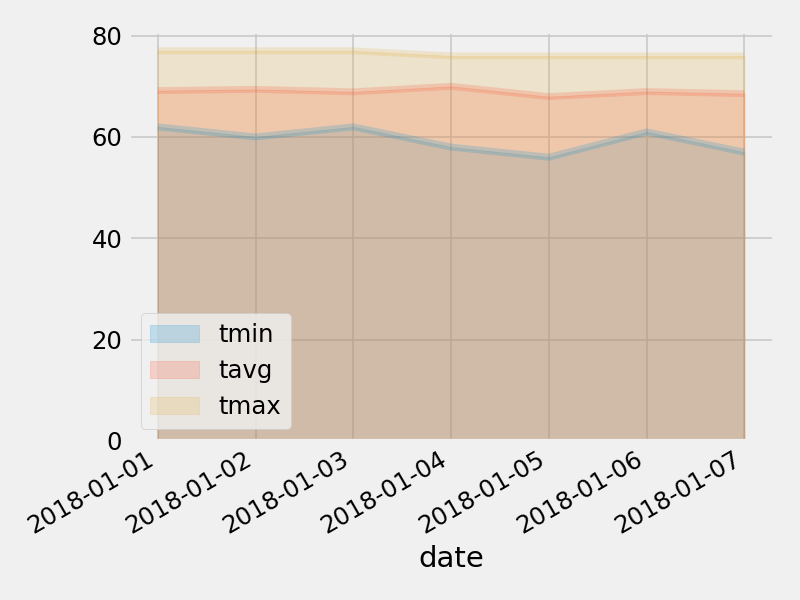

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
